# Attention : 
# Faire "File -> Save a copy in Drive" avant de commencer à modifier le notebook, sinon vos modifications ne seront pas sauvegardées.


In [1]:
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
!unzip TP1-2-data.zip

!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2/tools.py


--2020-10-08 16:12:38--  http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86446976 (82M) [application/zip]
Saving to: ‘TP1-2-data.zip.1’

TP1-2-data.zip.1    100%[===================>]  82.44M  19.8MB/s    in 5.0s    

2020-10-08 16:12:43 (16.6 MB/s) - ‘TP1-2-data.zip.1’ saved [86446976/86446976]

Archive:  TP1-2-data.zip
replace data/Scene/PARoffice/image_0091.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: data/Scene/PARoffice/image_0091.jpg  
 extracting: data/Scene/PARoffice/image_0167.jpg  
  inflating: data/Scene/PARoffice/image_0037.jpg  
 extracting: data/Scene/PARoffice/image_0135.jpg  
 extracting: data/Scene/PARoffice/image_0015.jpg  
 extracting: data/Scene/PARoffice/image_0182.jpg  
 extracting: data/Scene/PARoffice/image_0064.jpg  
 extracting: data/Scene/PA

In [2]:
!pip install numpy==1.16.2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
%run 'tools.py'
from os.path import join

data_path = "data"

# Partie 1 : SIFT

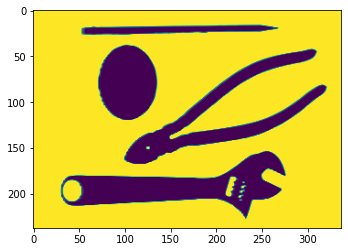

In [3]:
# example images
I = read_grayscale(join(data_path, 'tools.tiff'))
I2 = read_grayscale(join(data_path, 'Scene/CALsuburb/image_0205.jpg'))
plt.imshow(I)

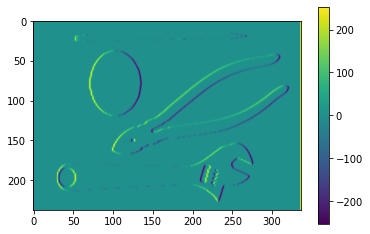

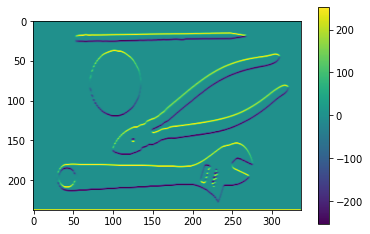

In [4]:
from scipy.signal import convolve2d
def compute_grad(I):
    Sx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])/4
    Sy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])/4

    Ix = convolve2d(I, Sx, 'same')
    Iy = convolve2d(I, Sy,'same')
    Ig = np.sqrt(Ix**2+Iy**2)

    return Ix, Iy

# example d'affichage du résultat
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [5]:
def compute_grad_mod_ori(I):
    Ix, Iy = compute_grad(I)
    Gn = np.sqrt(Ix**2+Iy**2)
    Go = compute_grad_ori(Ix, Iy, Gn)
    return Gn, Go

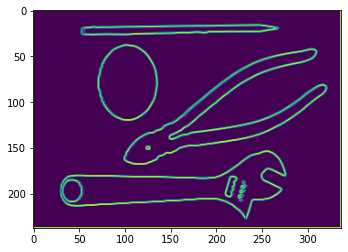

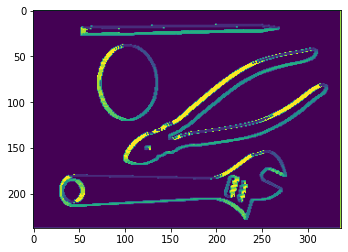

[[ 3  4  4 ...  4  4  5]
 [ 2 -1 -1 ... -1 -1  6]
 [ 2 -1 -1 ... -1 -1  6]
 ...
 [ 2 -1 -1 ... -1 -1  6]
 [ 2 -1 -1 ... -1 -1  6]
 [ 1  0  0 ...  0  0  7]]


In [6]:
Gn, Go = compute_grad_mod_ori(I)
plt.imshow(Gn)
plt.show()
plt.imshow(Go)
plt.show()
print(Go)

In [7]:
def compute_histogram(g_n, g_o):
    hist = np.zeros((8))
    for k in range(8):
      hist[k] = np.array(np.sum(np.where(g_o == k, g_n, 0)))
    return hist
  

In [8]:
def compute_sift_region(Gn, Go, mask=None):
    t_min=.5
    t_max=.2
    with_l2 = True

    patch_size = 16
    sift = np.zeros((128)) 

    if mask is not None:
        Gn = Gn * mask
    
    idx = 0
    for k in range(0, patch_size, 4):
        for l in range(0, patch_size, 4):
            hist = compute_histogram(Gn[l:l+4,k:k+4], Go[l:l+4,k:k+4])            
            sift[idx:idx+8] = hist
            idx += 8

    norm = np.linalg.norm(sift, ord=2)
    # min thresholding on norm
    if norm <= t_min:
        return np.zeros((128))
    # l2-normalization
    if with_l2:
        sift = sift / norm
    # max thresholding on values
    sift[sift >= t_max] = t_max
    # l2-normalization
    if with_l2:
        norm = np.linalg.norm(sift, ord=2)
        sift = sift / norm
    return sift

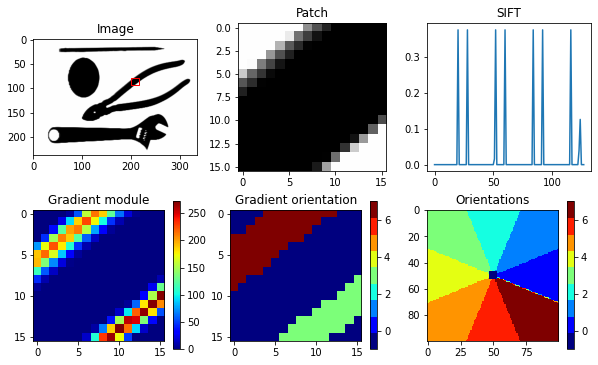

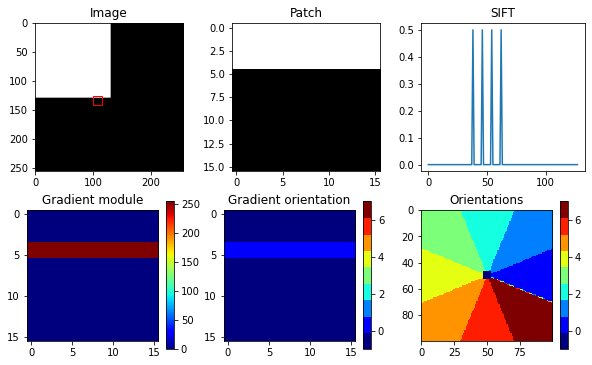

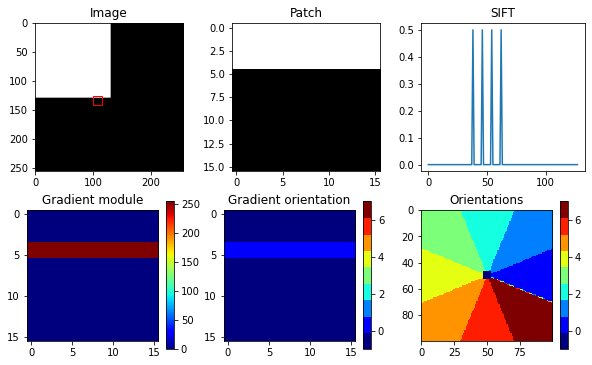

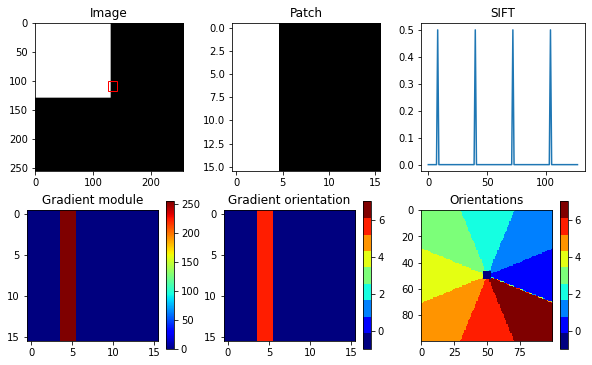

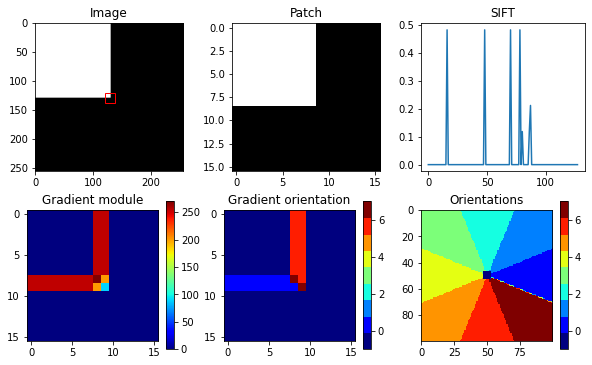

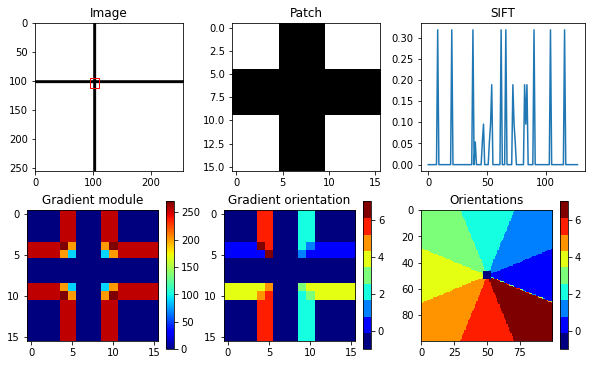

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.3181317 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.3181317 , 0.        ,
       0.05344409, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05344409, 0.09560369, 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.18864812,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3181317 , 0.        , 0.        ,
       0.        , 0.3181317 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18864812, 0.09560369, 0.05344

In [9]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
from tools import *
display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

In [10]:
def compute_sift_image(I):
    x, y = dense_sampling(I, s=16)
    im = auto_padding(I)
    m = gaussian_mask()
    
    #####################
    ## Votre code ici  ##
    #####################
    # Ici, effectuez les calculs sur l'image globale (norme, gradients)
    Gn, Go = compute_grad_mod_ori(I)

    ####################
    ##      FIN        #
    ####################

    sifts = np.zeros((len(x), len(y), 128))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            #####################
            ## Votre code ici  ##
            #####################
            sifts[i, j, :] = compute_sift_region(Gn[xi:xi+16, yj:yj+16], Go[xi:xi+16, yj:yj+16]) # TODO SIFT du patch de coordonnee (xi, yj)

            ####################
            ##      FIN        #
            ####################
            
    return sifts
    
compute_sift_image(I)

array([[[0.        , 0.        , 0.34827565, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.5       , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

# Compute SIFT

Le calcul durera plusieurs minutes.

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
max_images_per_class = 10  # You can change this to None to compute the whole dataset (takes quite some time)

save_path = "/content/gdrive/My Drive/rdfia/"
dir_sc = os.path.join(data_path, 'Scene')
dir_sift = os.path.join(save_path, 'sift')
inames, ilabls, cnames = load_dataset(dir_sc, images_per_class=max_images_per_class)
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs


# Partie 2 : Dictionnaire visuel

In [13]:
from sklearn.cluster import KMeans

path_vdict = os.path.join(save_path, 'kmeans', 'vdict.npy')
os.makedirs(os.path.join(save_path, 'kmeans'), exist_ok=True)

In [14]:
# Code here the `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]

    # TODO compute kmeans on `sift`, get cluster centers, add zeros vector, and return visual dict
    #####################
    ## Votre code ici  ##
    #####################
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sift)
    vdict = np.vstack([kmeans.cluster_centers_, np.zeros((128))])
    
    
    ####################
    ##      FIN        #
    ####################
    return vdict


In [17]:
# Run the visual dict computation (saved the first time)
vdict = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict


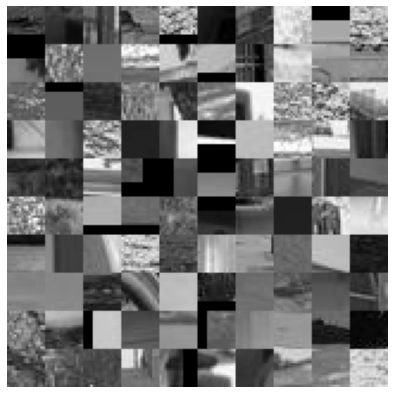

REGSIONS shape : (31356, 16, 16)
Closest region for each visual dictionary :





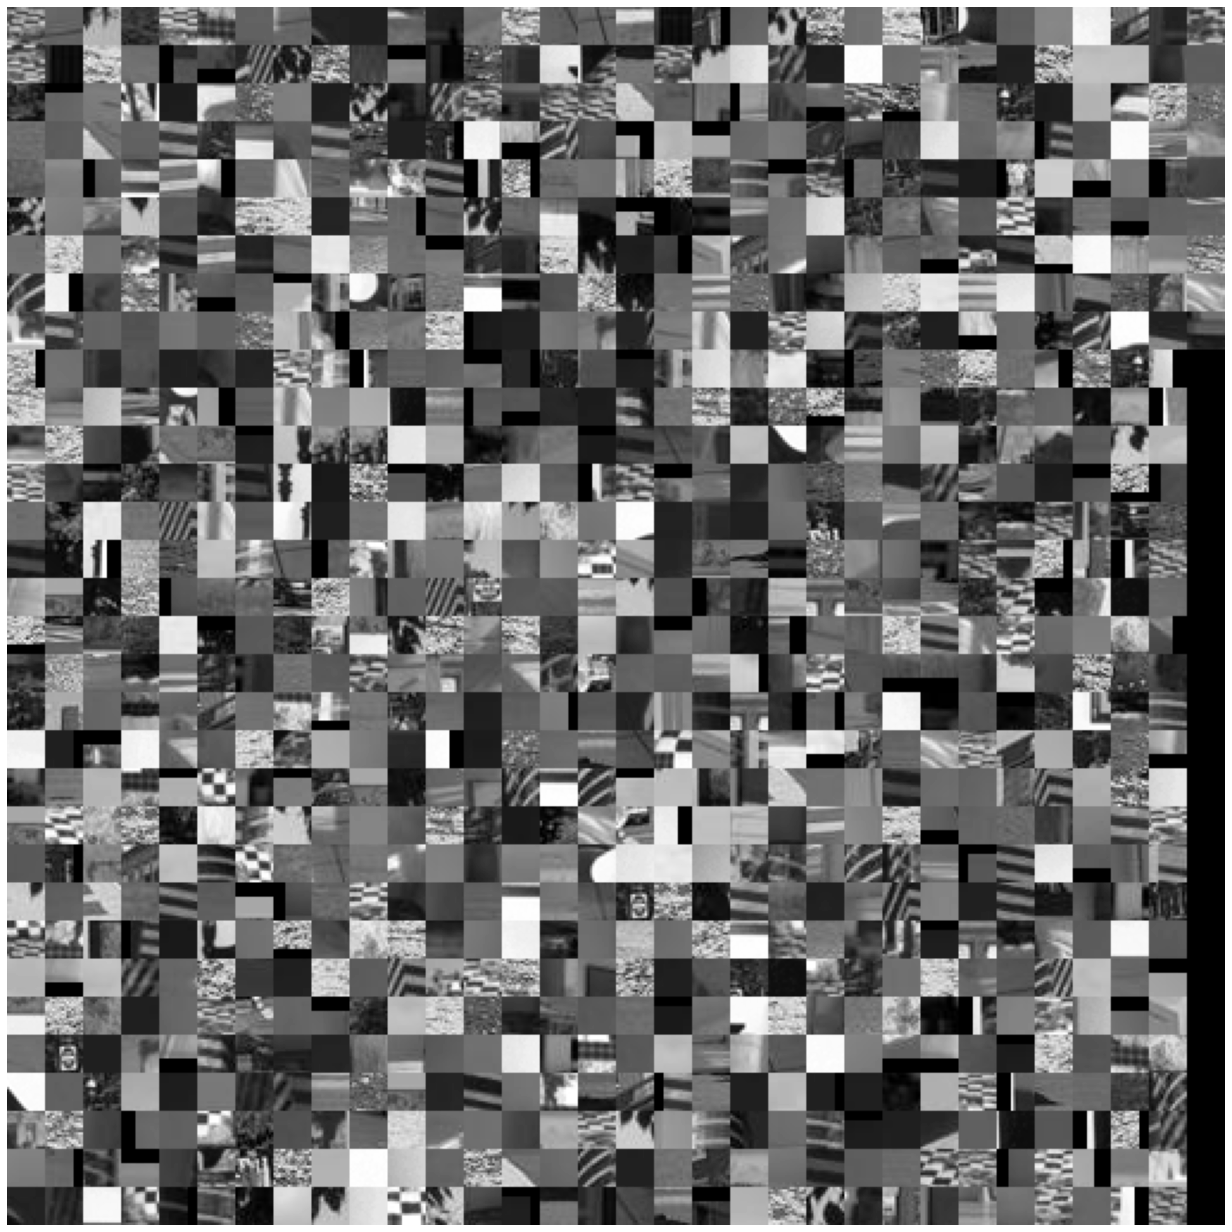

In [18]:
# Study of the dict
from sklearn.metrics.pairwise import euclidean_distances
# choose random images
indexes = np.random.randint(0, len(inames), 30)
sifts = [sifts_list_by_image[i] for i in indexes]
chosen_inames = [inames[i] for i in indexes]

regions, sifts = get_regions_and_sifts(dir_sc, chosen_inames, sifts) # Compute SIFT and regions from 30 random images
display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions

# TODO visually analyze the dict through similar example regions
#

print("REGSIONS shape : "+str(regions.shape))

# Ideally, create `vdregions`, a numpy array of size 1001 x 16 x 16 where each of the 1001 elements is a
distances = euclidean_distances(vdict, sifts)

argmin_sift_vdict = np.argmin(distances, axis=1)
vdregions = regions[argmin_sift_vdict]

print("Closest region for each visual dictionary :\n\n\n")
display_images(vdregions)
# "prototype" patch that is very close to the cluster center

# Partie 3 : BoW

In [19]:
# TODO Compute BoW for an image
# indication: scipy.spatial.distance_matrix

from scipy.spatial import distance_matrix
import sys
np.set_printoptions(threshold=sys.maxsize)
def compute_feats(vdict, image_sifts):
    """
    vdict: (num_clusters, 128): visual dictionnary containing all clusters.
    image_sifts: (H, W, 128) all sift features from the given image
    """
    # flatten sifts
    #print("vdict shape : "+str(vdict.shape))

    sifts = image_sifts.reshape(-1, 128)  # (N, 128)
    feats = np.zeros(vdict.shape[0])

    ##################### 
    ## Votre code ici  ##
    #####################
    # compute distance from image sifts to vdict

    flatten = image_sifts.reshape(image_sifts.shape[0]*image_sifts.shape[1], 128)
    feat = euclidean_distances(vdict, flatten )
    for i in feat:
      feats[np.argmin(i)]+=1
    
    #print("FEATS : \n"+str(feats))
    #print("SUM : "+str(np.sum(feats)))
    ####################
    ##      FIN        #
    ####################
    return feats

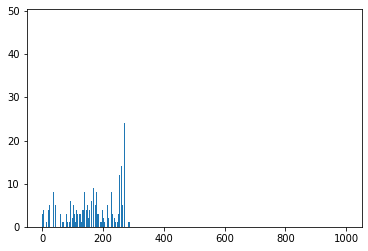

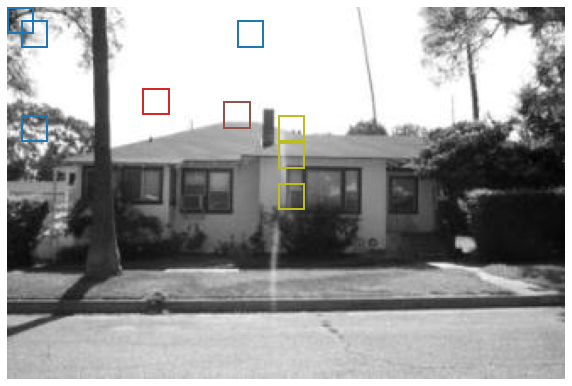

(9, 16, 16)


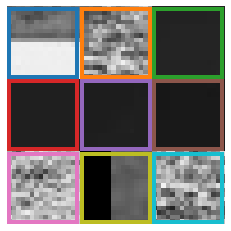

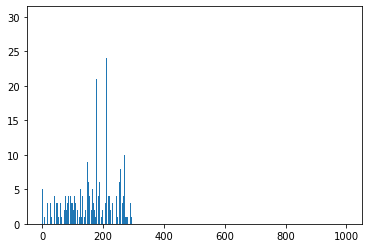

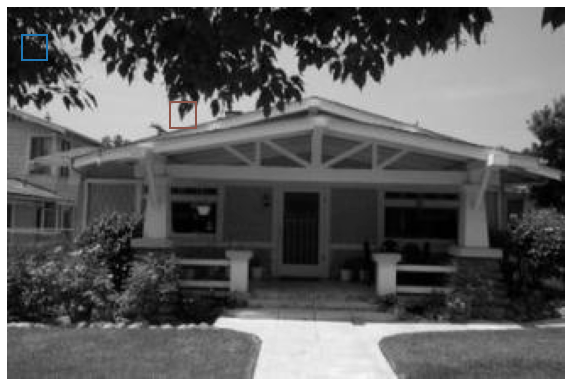

(9, 16, 16)


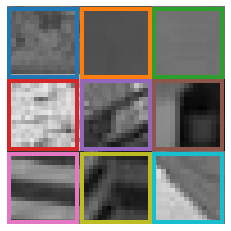

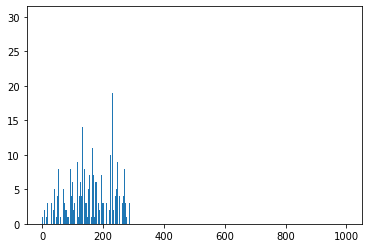

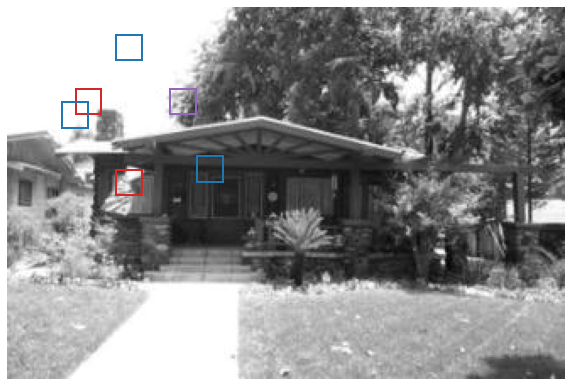

(9, 16, 16)


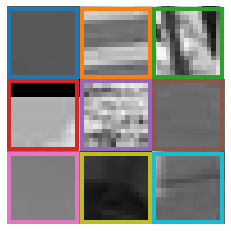

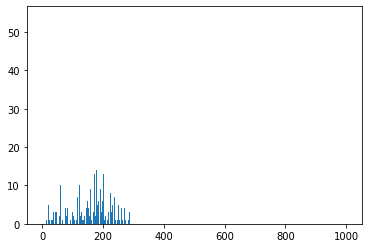

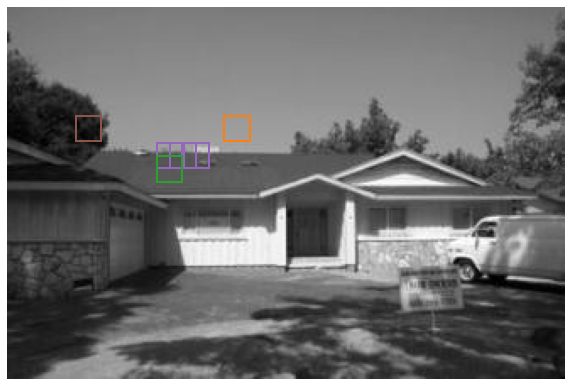

(9, 16, 16)


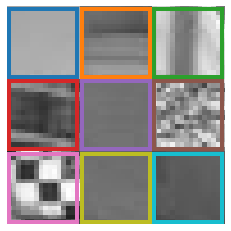

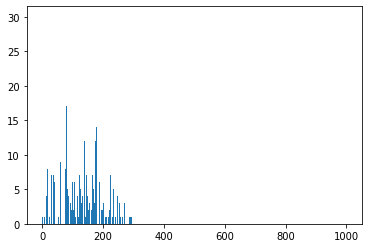

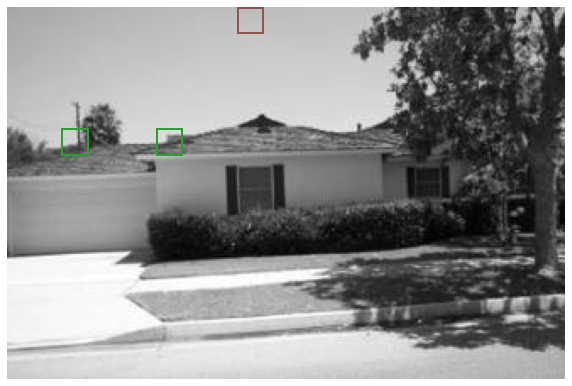

(9, 16, 16)


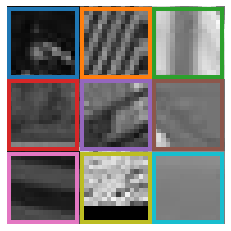

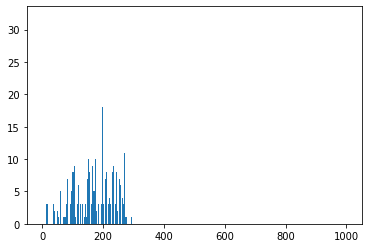

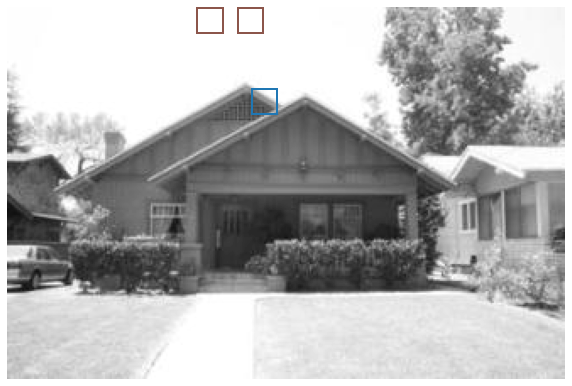

(9, 16, 16)


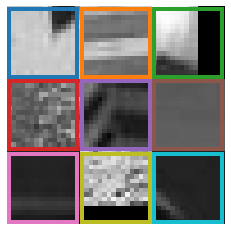

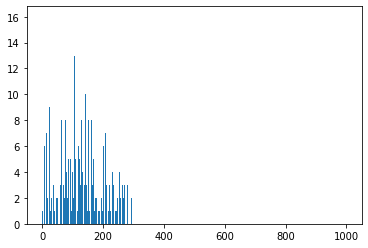

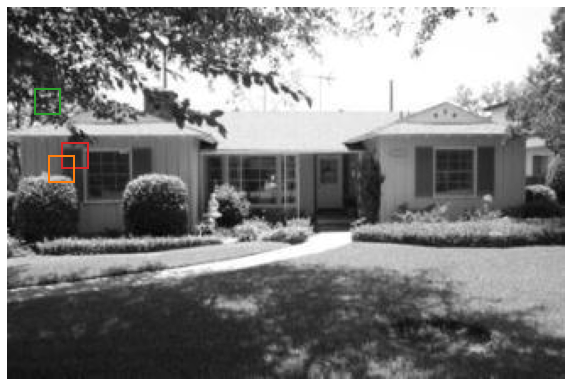

(9, 16, 16)


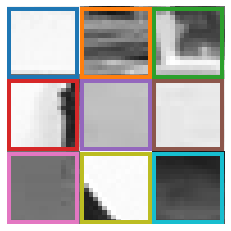

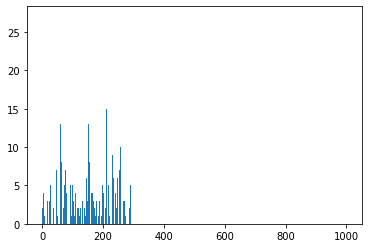

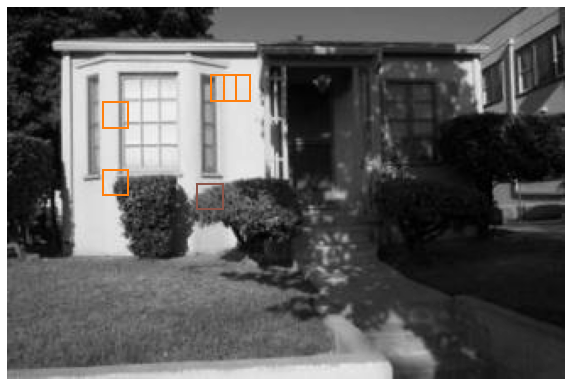

(9, 16, 16)


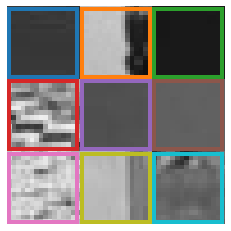

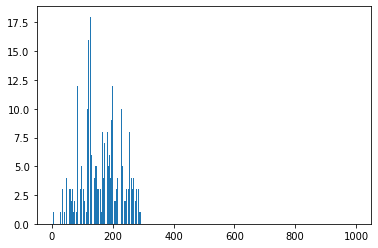

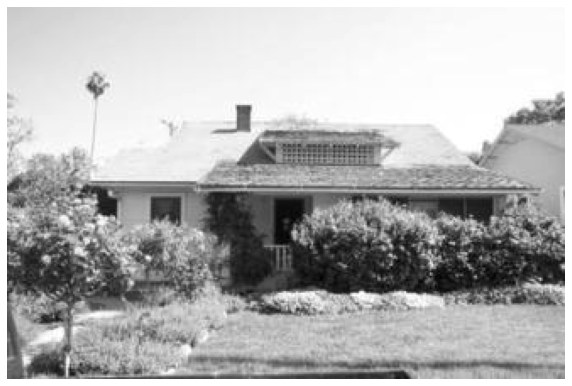

(9, 16, 16)


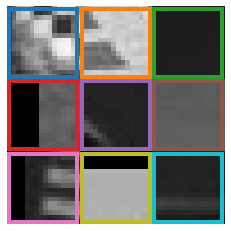

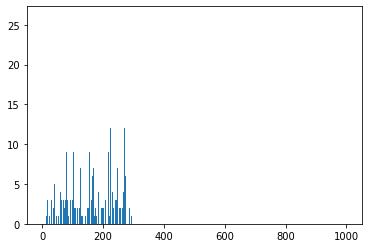

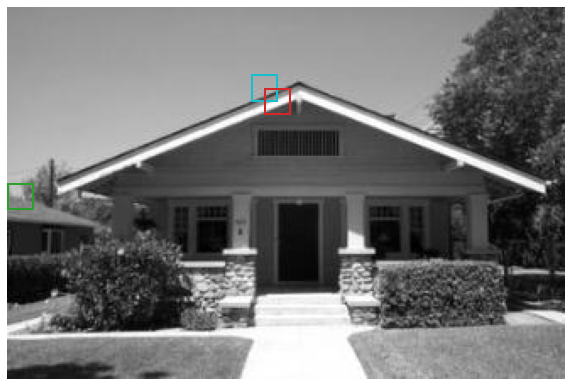

(9, 16, 16)


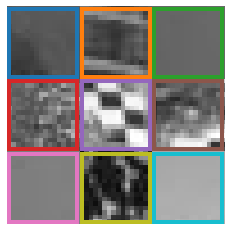

In [20]:
# Visualize your BoW on an image
#for i in range(len(inames)):
for i in range(10):
  iname = inames[i]
  ipath = os.path.join(dir_sc, iname)
  im = read_grayscale(ipath)
  sift = compute_sift_image(im)
  sift = (sift * 255).astype('uint8')
  regions = compute_regions(im)
  feats = compute_feats(vdict, sift)

  display_vdregions_image(im, vdict, sift, feats, vdregions=vdregions) # if you have vdregions, add it as input here